<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_10/Chatpter10_Intro_to_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Fashion MNIST

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
fashion_mnist = tf.keras.datasets.fashion_mnist
train_val, test = fashion_mnist.load_data()
X_train_val, y_train_val = train_val
X_train, X_val = X_train_val[:-5000], X_train_val[-5000:]
y_train, y_val = y_train_val[:-5000], y_train_val[-5000:]
X_test, y_test = test
X_train, X_val, X_test = X_train/255.0, X_val/255.0, X_test/255.0
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,), (10000, 28, 28), (10000,))

In [ ]:
tf.keras.utils.set_random_seed(0)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model = tf.keras.Sequential([
#   tf.keras.layers.Input(shape=[28, 28]),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(300, activation='relu'),
#   tf.keras.layers.Dense(100, activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # Model EDA
# model.layers
# model.layers[1].name, model.get_layer('dense')
# model.layers[1].activation
# weights, biases = model.layers[1].get_weights()
# weights.shape, biases.shape

In [ ]:
model.compile(
  loss = 'sparse_categorical_crossentropy',
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), # 'sgd' will keep learning rate fixed - use functions in general - more customization possible
  metrics = ['accuracy']
)

In [ ]:
history = model.fit(
  X_train, y_train,
  validation_data = (X_val, y_val),
  epochs = 30
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6817 - loss: 0.9863 - val_accuracy: 0.8190 - val_loss: 0.5084
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8262 - loss: 0.4994 - val_accuracy: 0.8366 - val_loss: 0.4533
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8439 - loss: 0.4470 - val_accuracy: 0.8460 - val_loss: 0.4291
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8545 - loss: 0.4176 - val_accuracy: 0.8522 - val_loss: 0.4139
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8608 - loss: 0.3967 - val_accuracy: 0.8556 - val_loss: 0.4032
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8673 - loss: 0.3800 - val_accuracy: 0.8578 - val_loss: 0.3947
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8704 - loss: 0.3661 - val_accuracy: 0.8608 - val_loss: 0.3862
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8743 - loss: 0.3540 -

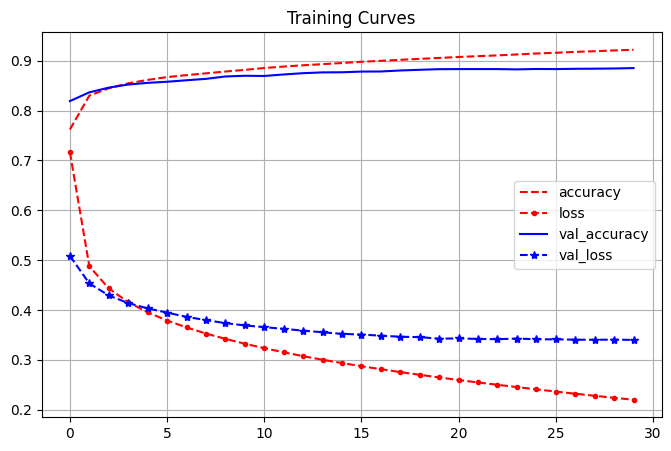

In [ ]:
# history.history.keys()
# history.epoch
# history.params

pd.DataFrame(history.history).plot(
  figsize=(8, 5),
  grid = True,
  style = ['r--', 'r--.', 'b-', 'b--*'],
  title='Training Curves'
)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8797 - loss: 0.3554


[0.3535756468772888, 0.8791999816894531]

In [ ]:
probs = model.predict(X_test[:3])
probs.round(2), y_test[:3]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


(array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.06, 0.  , 0.93],
        [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
       dtype=float32),
 array([9, 2, 1], dtype=uint8))

In [ ]:
np.argmax(probs, axis=1), np.array(class_names)[np.argmax(probs, axis=1)]

(array([9, 2, 1]), array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11'))

# Regression using MLP

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=0, test_size=0.25)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((11610, 8), (11610,), (3870, 8), (3870,), (5160, 8), (5160,))

In [ ]:
tf.keras.utils.set_random_seed(0)
norm_layer = tf.keras.layers.Normalization(input_shape=X.shape[1:], axis=-1) # input shape just needs the number of columns (it can scale up to any number of samples so does not need that specified)
model = tf.keras.Sequential([
  norm_layer,
  tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss = tf.keras.losses.MeanSquaredError()
model.compile(loss=loss, optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

In [ ]:
history = model.fit(
  X_train, y_train,
  validation_data = (X_val, y_val),
  epochs = 20
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - RootMeanSquaredError: 1.2894 - loss: 1.7817 - val_RootMeanSquaredError: 0.6573 - val_loss: 0.4320
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6301 - loss: 0.3972 - val_RootMeanSquaredError: 0.6254 - val_loss: 0.3912
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6006 - loss: 0.3611 - val_RootMeanSquaredError: 0.6104 - val_loss: 0.3726
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5864 - loss: 0.3443 - val_RootMeanSquaredError: 0.5993 - val_loss: 0.3592
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5761 - loss: 0.3324 - val_RootMeanSquaredError: 0.5904 - val_loss: 0.3486
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5668 - loss: 0.3218 - val_RootMeanSquaredError: 0.5821 - val_loss: 0.3389
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5601 - los

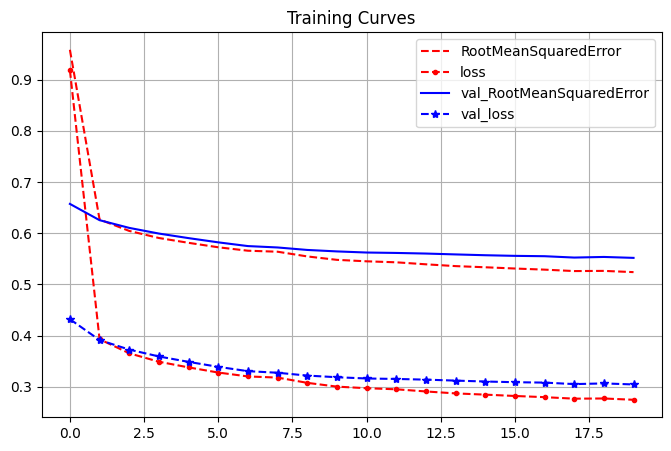

In [ ]:
pd.DataFrame(history.history).plot(
  figsize=(8, 5),
  grid = True,
  style = ['r--', 'r--.', 'b-', 'b--*'],
  title='Training Curves'
)
plt.show()

In [ ]:
model.evaluate(X_test, y_test, return_dict=True)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5694 - loss: 0.3245


{'RootMeanSquaredError': 0.5608640313148499, 'loss': 0.3145684599876404}

In [ ]:
model.evaluate(
  X_test, y_test,
  return_dict=True,
  verbose=2
)
# the reason why verbose=1 prints a different result than what is returned is
# because it averages by the number of batches instead of number of samples,
# and the last batch here as less samples than all the other batches.
# So it will not be an exact match with the returned output
# (which is an average by number of samples)

162/162 - 0s - 1ms/step - RootMeanSquaredError: 0.5609 - loss: 0.3146


{'RootMeanSquaredError': 0.5608640313148499, 'loss': 0.3145684599876404}

# Functional API

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=0, test_size=0.25)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((11610, 8), (11610,), (3870, 8), (3870,), (5160, 8), (5160,))

In [3]:
tf.keras.utils.set_random_seed(0)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:], axis=-1)
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normed = norm_layer(input_)
hidden1 = hidden_layer1(normed)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normed, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss = tf.keras.losses.MeanSquaredError()
model.compile(loss=loss, optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 8)              │             17 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            270 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ normalization[0][0],   │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [4]:
history = model.fit(
  X_train, y_train,
  validation_data = (X_val, y_val),
  epochs = 20
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 1.5210 - loss: 2.4048 - val_RootMeanSquaredError: 0.8300 - val_loss: 0.6889
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7372 - loss: 0.5438 - val_RootMeanSquaredError: 0.6533 - val_loss: 0.4269
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6232 - loss: 0.3888 - val_RootMeanSquaredError: 0.6257 - val_loss: 0.3915
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6003 - loss: 0.3607 - val_RootMeanSquaredError: 0.6159 - val_loss: 0.3793
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5893 - loss: 0.3477 - val_RootMeanSquaredError: 0.6088 - val_loss: 0.3706
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5811 - loss: 0.3381 - val_RootMeanSquaredError: 0.6021 - val_loss: 0.3625
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5750 - los

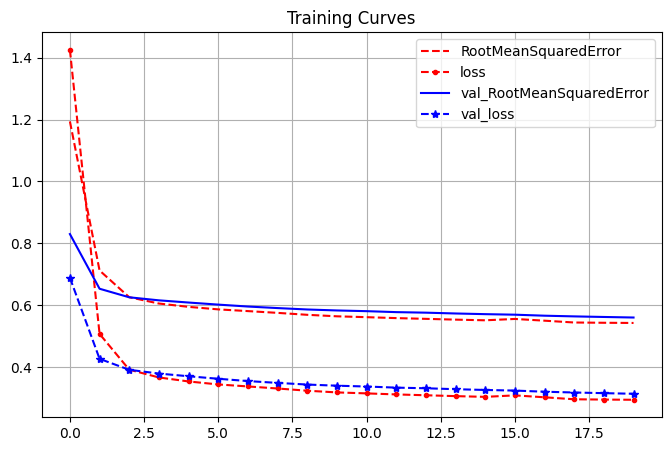

In [5]:
pd.DataFrame(history.history).plot(
  figsize=(8, 5),
  grid = True,
  style = ['r--', 'r--.', 'b-', 'b--*'],
  title='Training Curves'
)
plt.show()

In [6]:
model.evaluate(
  X_test, y_test,
  return_dict=True,
  verbose=1
)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.5576 - loss: 0.3114


{'RootMeanSquaredError': 0.5542452931404114, 'loss': 0.30718785524368286}

# Multi Input

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=0, test_size=0.25)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

In [ ]:
tf.keras.utils.set_random_seed(0)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:], axis=-1)
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normed = norm_layer(input_)
hidden1 = hidden_layer1(normed)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normed, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss = tf.keras.losses.MeanSquaredError()
model.compile(loss=loss, optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
model.summary()

In [ ]:
history = model.fit(
  X_train, y_train,
  validation_data = (X_val, y_val),
  epochs = 20
)

In [ ]:
pd.DataFrame(history.history).plot(
  figsize=(8, 5),
  grid = True,
  style = ['r--', 'r--.', 'b-', 'b--*'],
  title='Training Curves'
)
plt.show()

In [ ]:
model.evaluate(
  X_test, y_test,
  return_dict=True,
  verbose=1
)